# Data 3550 - Homework 5

### Professor Ramchandra Rimal
### Nicholas Sartino
### M00392300

In [ ]:
# Install Modules if needed

#!pip install missingno

In [2]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

# trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score
from sklearn.metrics import roc_curve, auc

/var/folders/q_/tlj94ng165zc5l_0x0clcwg00000gn/T/ipykernel_54402/2954141809.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above
/var/folders/q_/tlj94ng165zc5l_0x0clcwg00000gn/T/ipykernel_54402/2954141809.py:20: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 1. (20 points) For this problem you need to use the Heart dataset and seek to classify the patient have AHD or not using classification trees and related approaches.

 1. (a) Preprocess the data, you may need to convert the categorical variables to dummy variables, impute or drop the missing values. (3 points)



In [53]:
# Read Data
df = pd.read_csv('Heart.csv', index_col=0)

In [54]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [55]:
# Preview data
df.head(303)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [56]:
# Basic Stats
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


<Axes: >

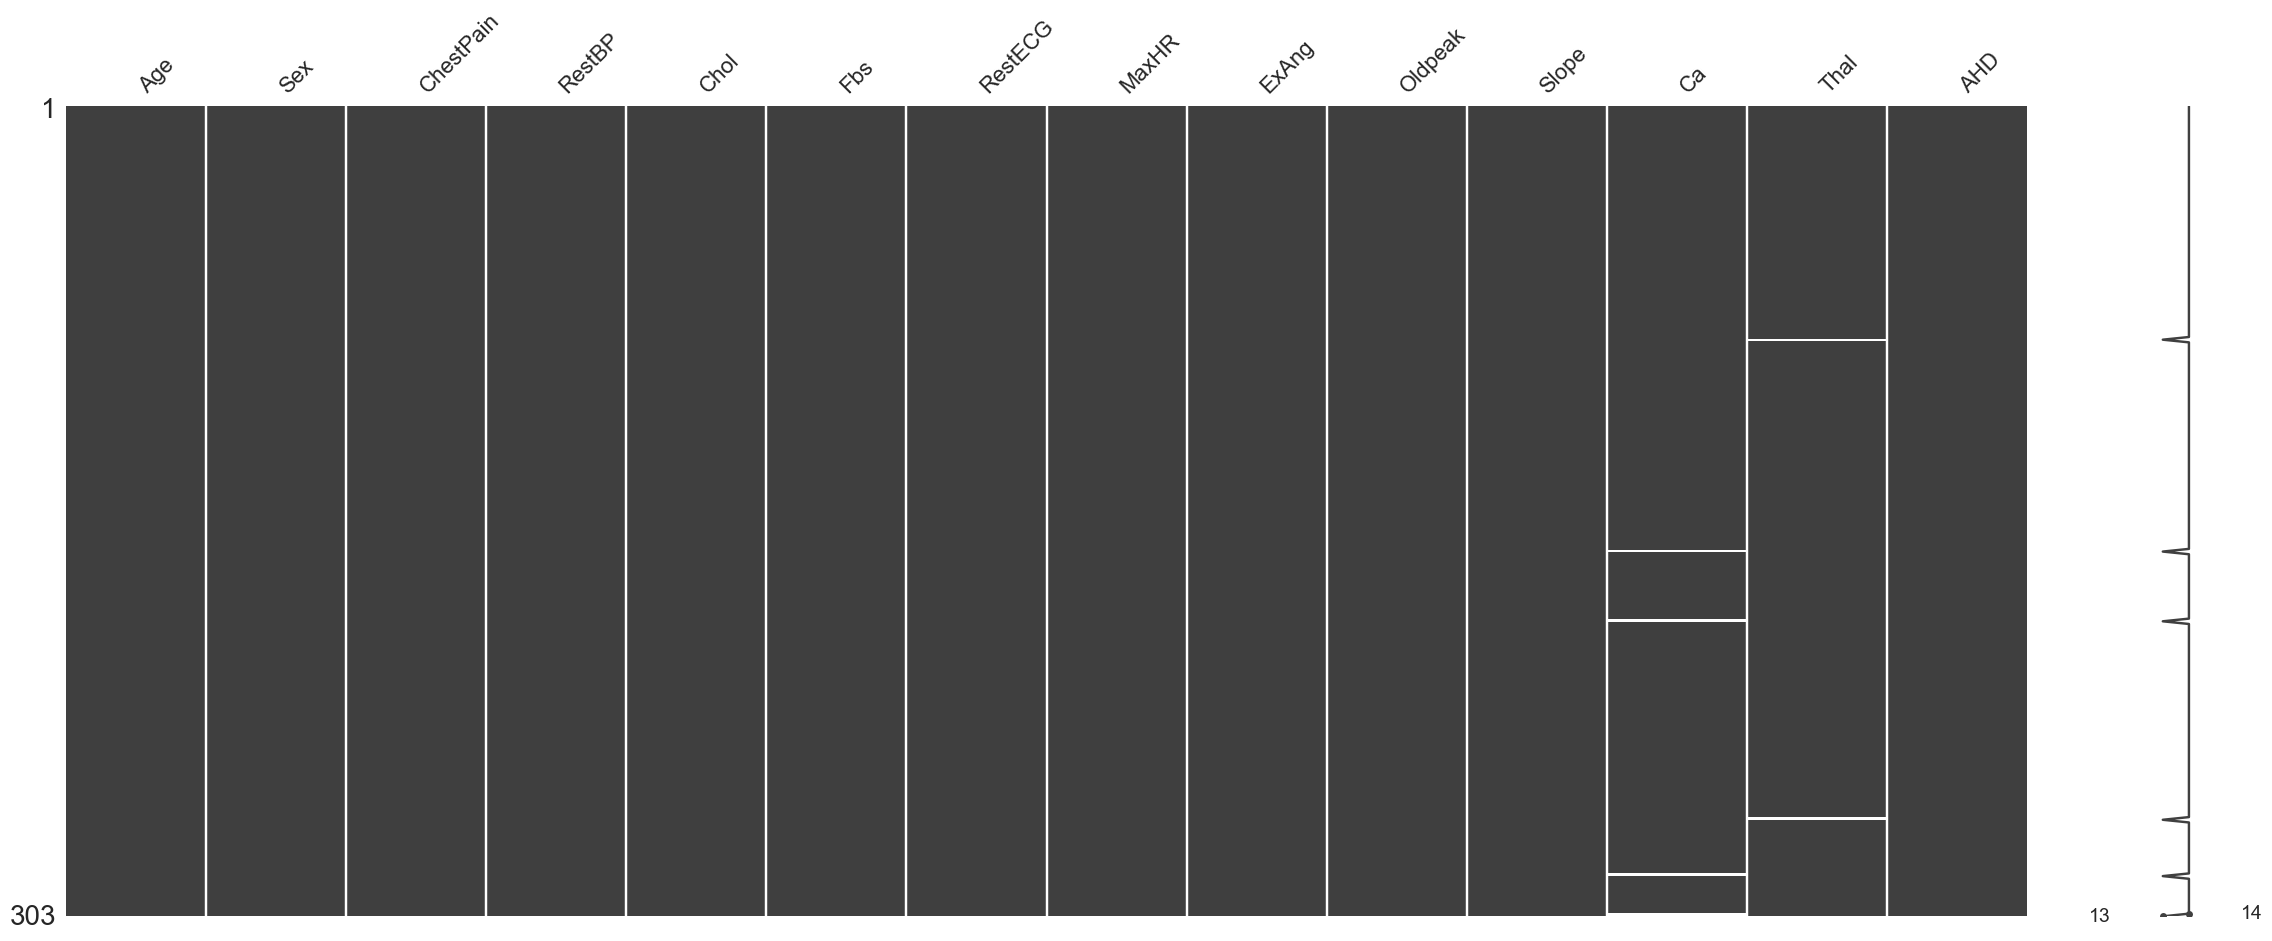

In [57]:
# Visualize missing values
msno.matrix(df)

In [58]:
# Confirm NA Counts
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

Because there are only a few rows with NaN values, I decided to drop them instead of filling with the mean value.  The values for 'Ca' appear to all be integers, but the mean is a decimal, so I didn't want to use the mean here.  The field 'Thal' is a description field that I don't know enough about to attempt substituting or inferring the correct value.

In [59]:
# Drop rows with NaN values in any column
df = df.dropna()

In [60]:
# Create dummies for categorical values and drop them from df

# Select categorical columns (object types) excluding the target column
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['AHD'])

# Create binary dummies for categorical columns
dummies = pd.get_dummies(df[categorical_columns], drop_first=False)

# Append the dummies to the original DataFrame
df = pd.concat([df, dummies], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)


In [61]:
# Select binary dummy columns (True/False)
binary_dummy_columns = df.select_dtypes(include=bool).columns

# Replace True/False with 1/0 in the binary dummy columns
df[binary_dummy_columns] = df[binary_dummy_columns].astype(int)

In [62]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,0,1,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,1,0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,1,0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,0,1,0,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,0,1,0,0,1,0


1. (b) Split the data set into a training set and a test set in which training set consists of 70% of the data and the remaining data on the test set. (1 point)

In [63]:
# Separate the features (X) and the target variable (y)
X = df.drop('AHD', axis=1)  # Features
y = df['AHD']  # Target variable

# Split the data into a training set and a test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (207, 18) (207,)
Test set shape: (90, 18) (90,)


2. (a)
Fit a tree to the training data, with AHD as the response and the other variables as predictors. (1 points)
(b) Calculate the accuracy, sensitivity and specificity on the training data. Describe the results obtained. (1 points)
(c) Calculate the accuracy, sensitivity and specificity on the test data. Describe the results obtained. (2 points)
(d) Create a variable importance plot. (1 points)


In [ ]:
3. (a)
Using the result from part 1, Fit a tree to the training data, with AHD as the response and the most important 7 variables as predictors. (2 points)
(b) Calculate the accuracy, sensitivity and specificity on the training data. Describe the results obtained. (2 points)
(c) What is the training accuracy? Is there any difference in score compared to previous model that uses all predictors? (1 points)
(d) Create a plot of the tree, and interpret the results. (2 points)
(e) Pick one of the terminal nodes, and interpret the information displayed. (2 points)


4. (a)
Predict the response on the test data, and produce and plot a confusion matrix com- paring the test labels to the predicted test labels.
(b) What is the test accuracy? What would be the accuracy score without the model (i.e if we just classify the observation to the class with higher count)? Based on the results, is the model useful or not? (1 points)
(c) Plot a ROC curve and explain your observation. (2 points)